In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Multi linear regression/ToyotaCorolla.csv",encoding="latin1")

In [ ]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df.shape

(1436, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

**As given in the problem statement we have to use only these columns for our model ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")**

In [ ]:
data1=df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [ ]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


## **Cleaning Data**

We need to do some basic cleansing activity in order to feed our model the correct data.



In [ ]:
# Find if there is any blank values in the data
data1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
data1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [ ]:
#Correlation Matrix
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


Insights:


*   Price and Age_08_04 are highly negative correlated.
*   Price and KM is also negatively correlated.
*   Quarterly_Tax is correlated with weight



(1436, 9)

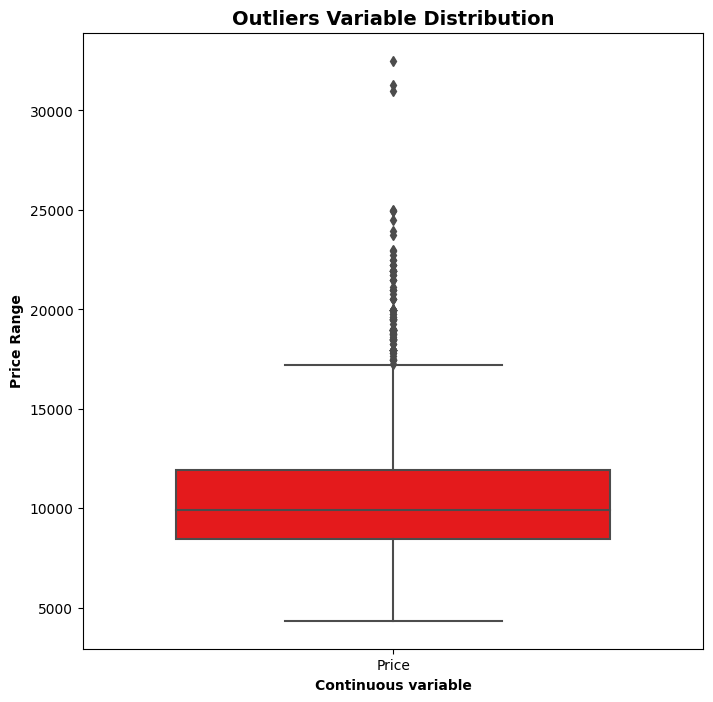

In [ ]:
# Outlier Analysis of target variable with maximum amount of inconsistency
outliers=["Price"]
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=data1[outliers],orient='v',palette="Set1",whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Price Range",fontweight='bold')
plt.xlabel("Continuous variable",fontweight='bold')
data1.shape

## **Insight:**
There are some outliers of price above 25000 but lets not remove it rather we will use standarization scaling.

In [ ]:
# Check for duplicates
data1.loc[data1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


We can remove duplicate row

In [ ]:
data1=data1.drop(113,axis=0)

In [ ]:
data1.loc[data1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


## **Visualization of data**

Here we will identify if some predictors directly have a strong association with the outcome variable price


Text(0, 0.5, 'Count of Cars')

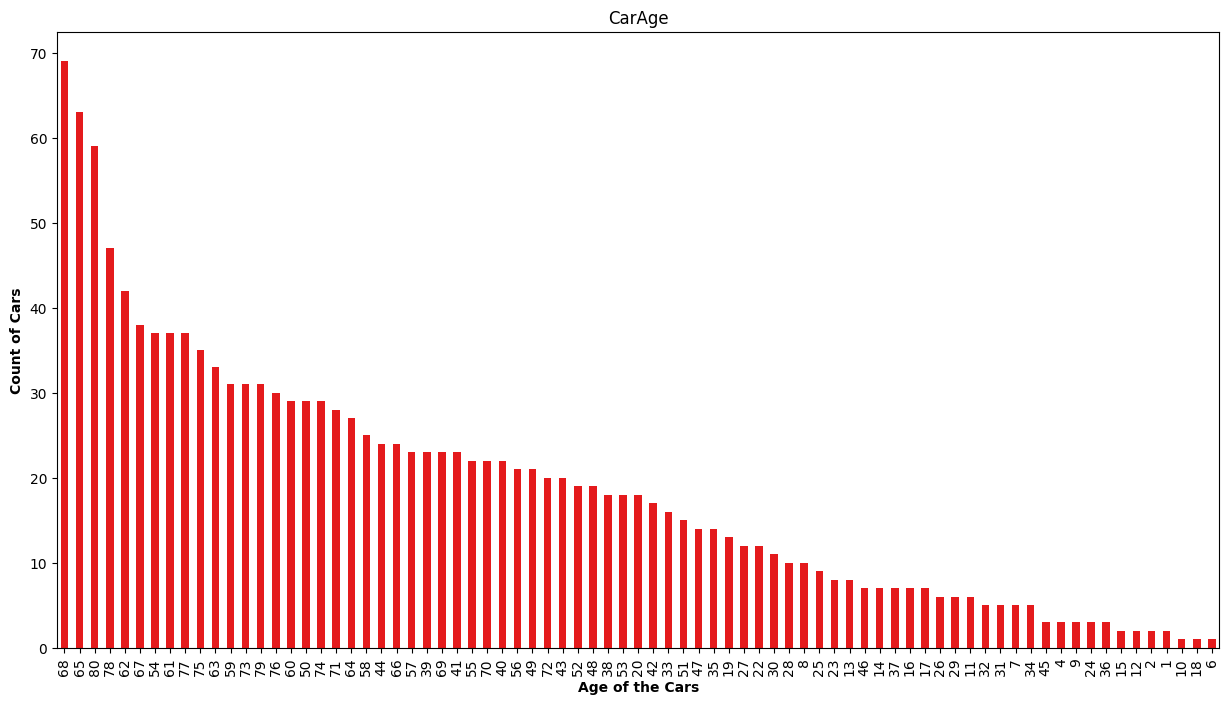

In [ ]:
# Visualizing the different car age available

plt.rcParams['figure.figsize'] = [15,8]
ax=data1['Age_08_04'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarAge')
plt.xlabel("Age of the Cars",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

## **Insights:**


*   Most of the cars are between 65 to 80
*   Least of the cars are between 1 to 35






## Visualization of distribution of car prices

<ipython-input-18-8edc25d1f6bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Price'])


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

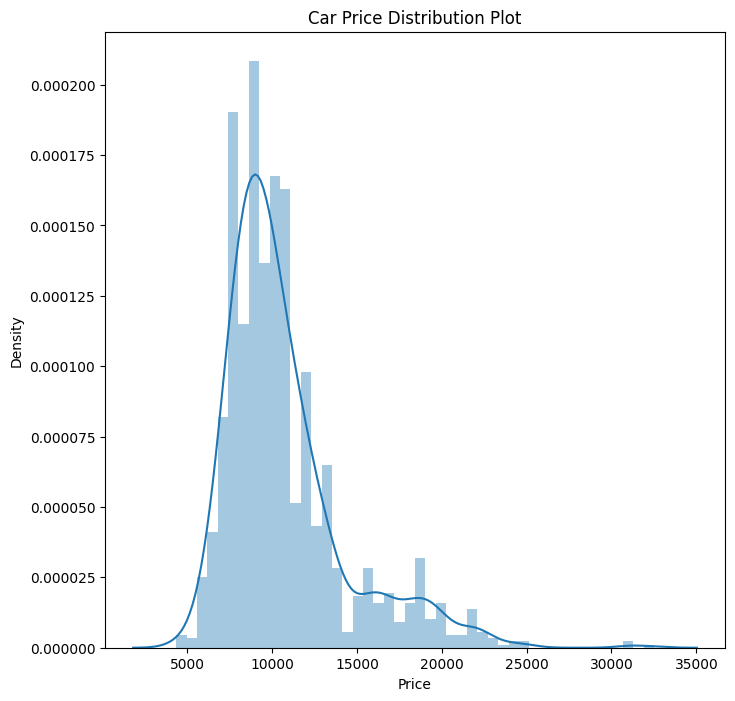

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(data1['Price'])

This plot seems to be right skewed, the price of mostly cars is less then 15000. 

## **Visualising Numeric Variables**
Pairplot of all the numeric variables

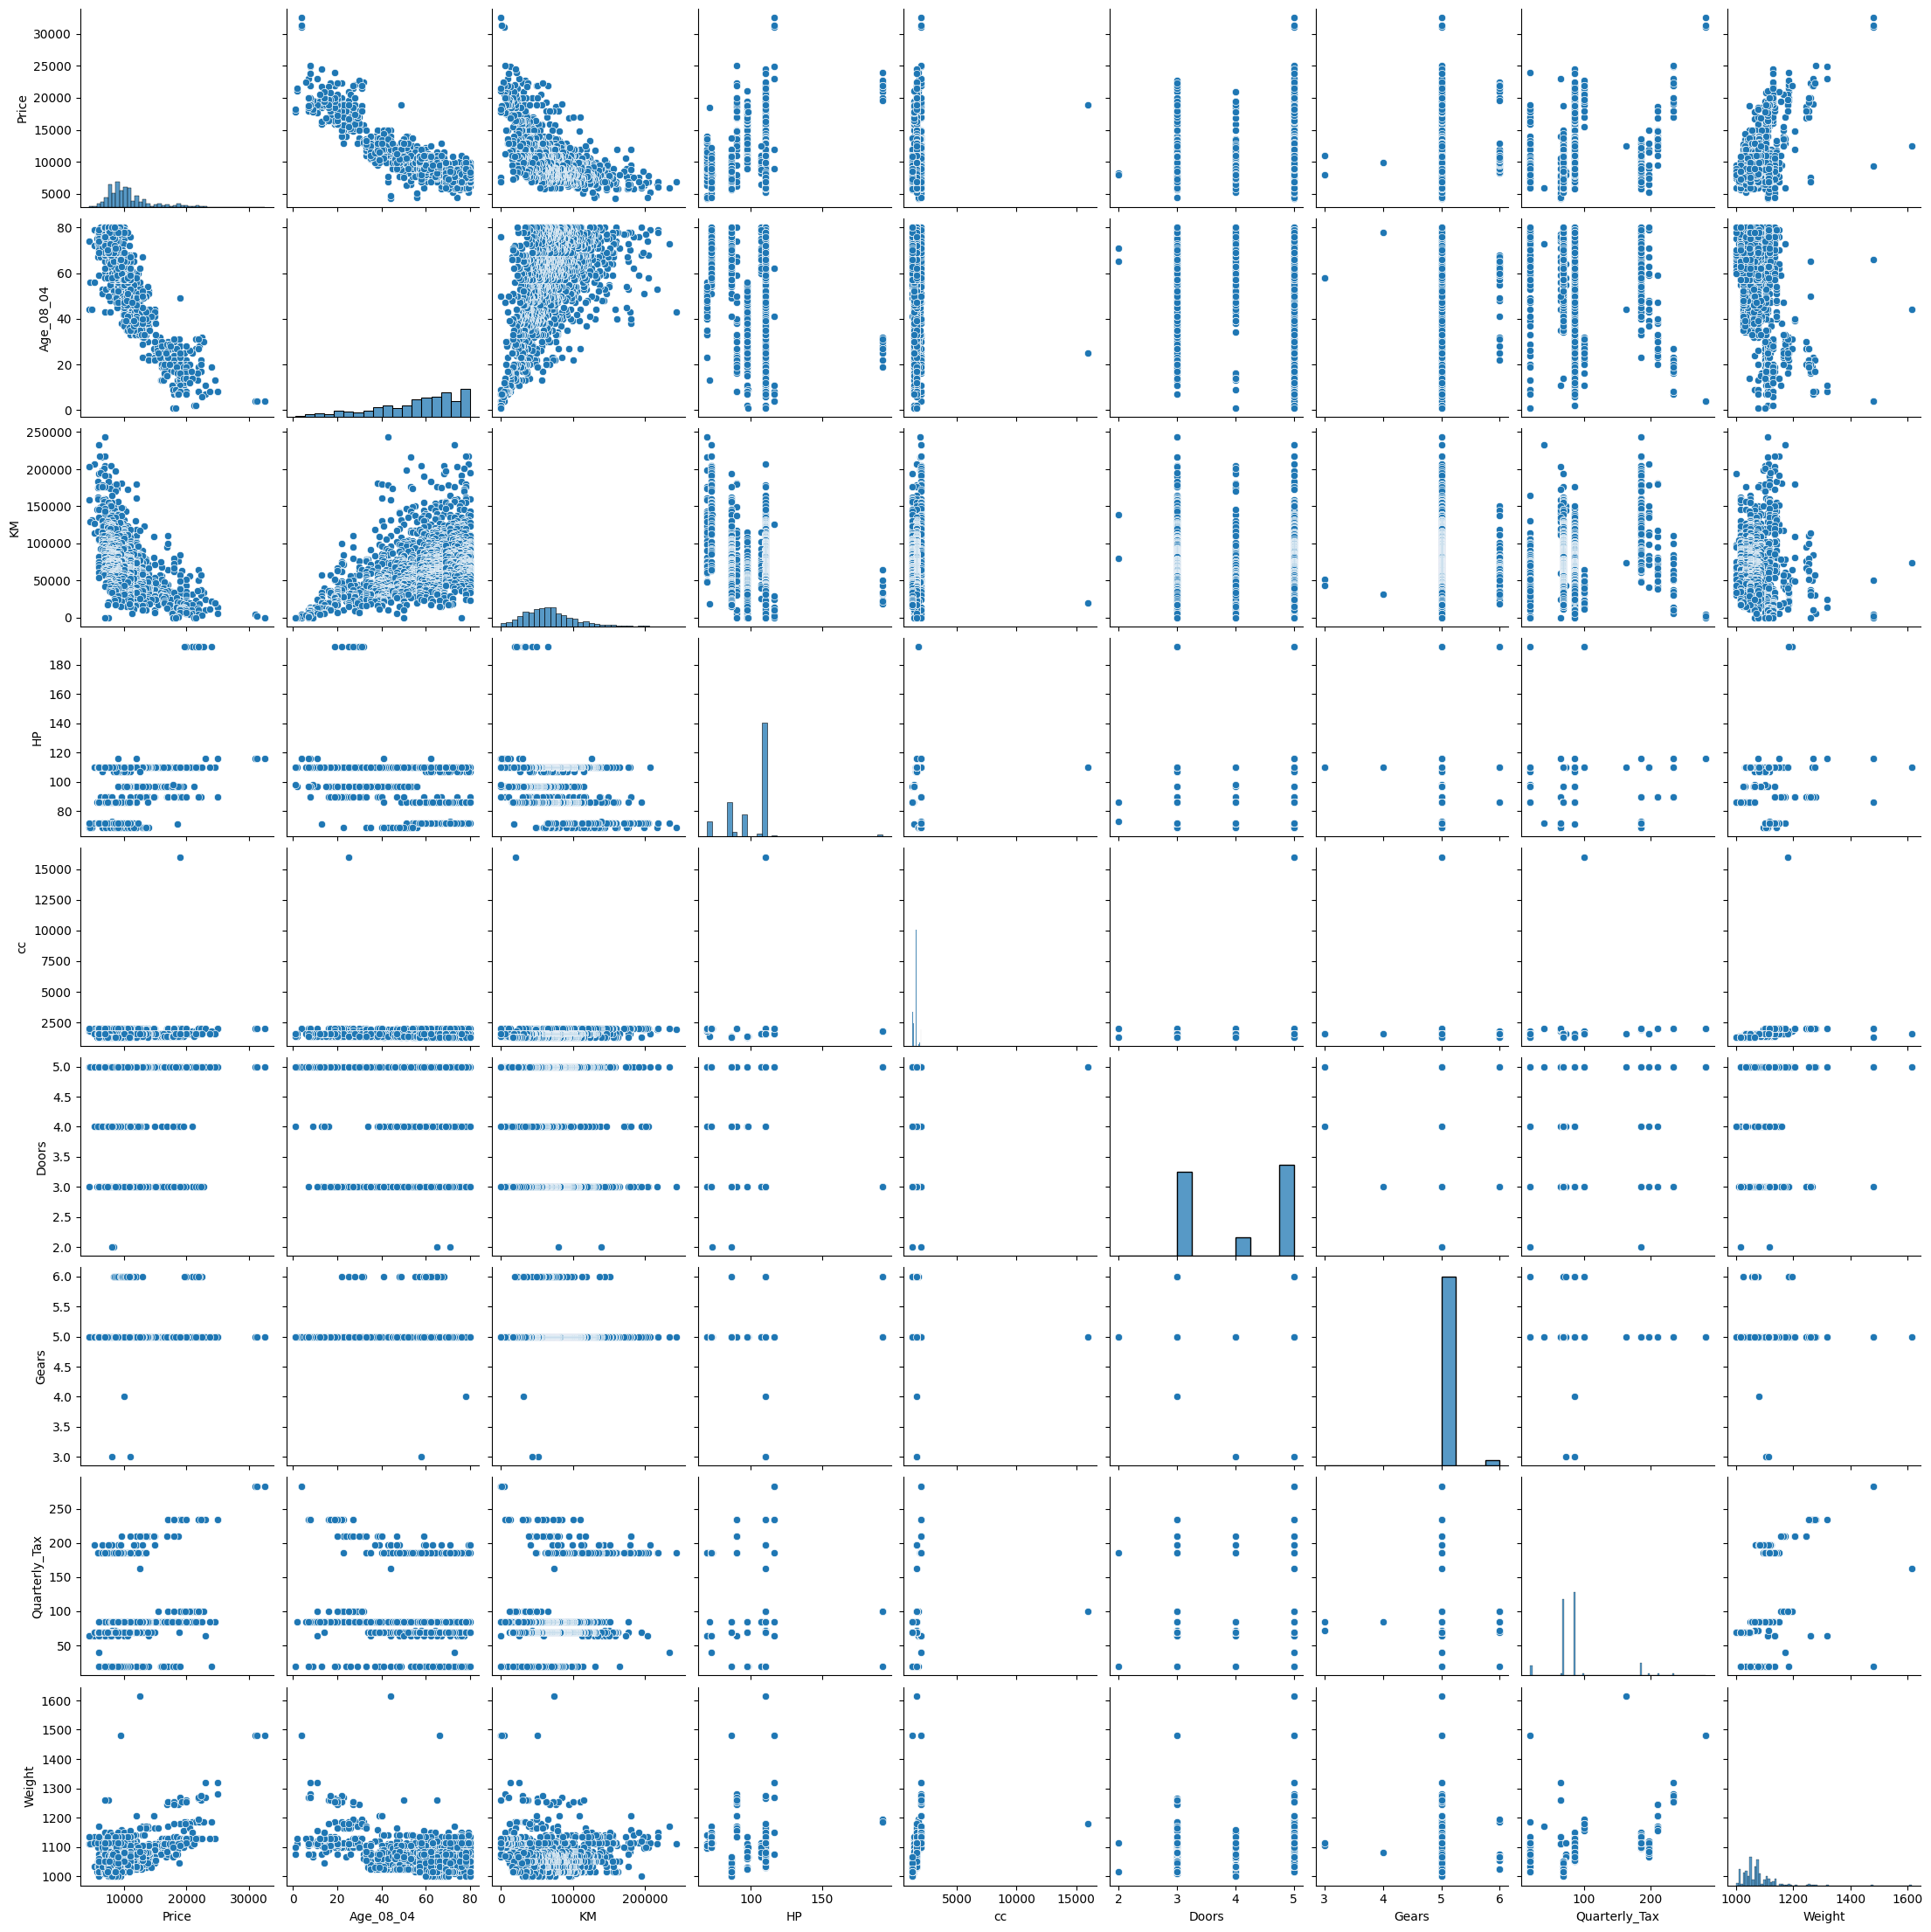

In [ ]:
sns.pairplot(data1)

## **Insights:**


*   Age and KM seems to have a negative correlation with price
*   "cc","Doors","Gears","Quarterly_Tax" doesn't show any significant trend with price.




[Text(0.5, 0, 'Door Type'), Text(0, 0.5, 'Frequency of Door type')]

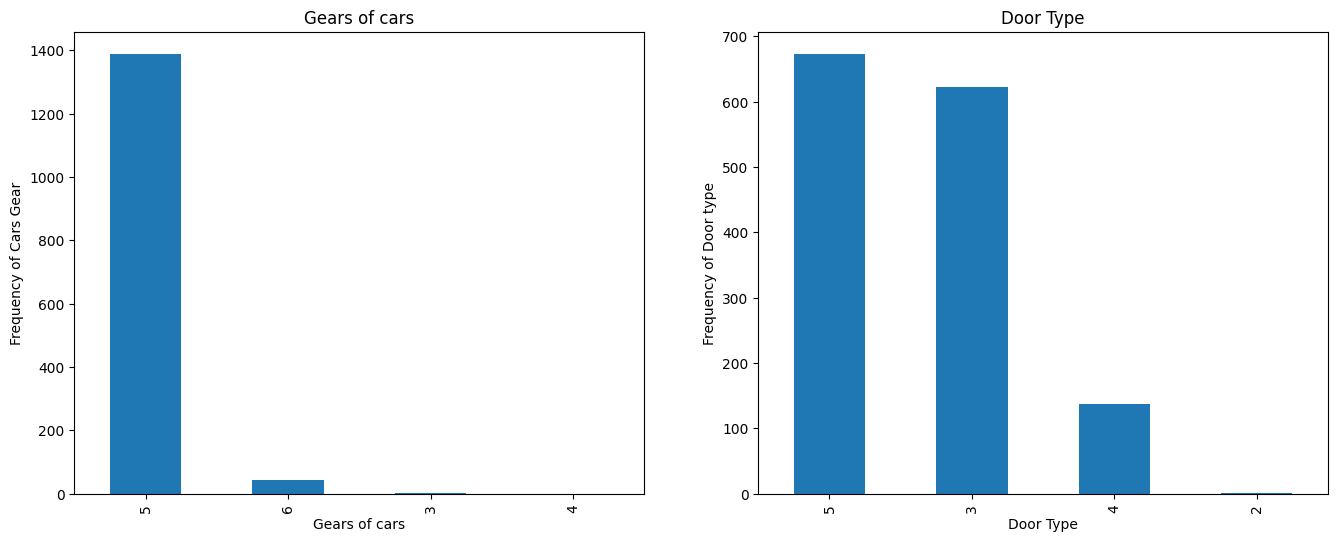

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data1['Gears'].value_counts().plot(kind='bar')
plt.title('Gears of cars')
plt1.set(xlabel = 'Gears of cars', ylabel='Frequency of Cars Gear')

plt.subplot(1,3,2)
plt1 = data1['Doors'].value_counts().plot(kind='bar')
plt.title('Door Type')
plt1.set(xlabel = 'Door Type', ylabel='Frequency of Door type')


## **Insights:**


*   Almost all cars have 5 Gears.
*   Mostly Cars are of 5 and 3 door type.



## **Average Price**

<Figure size 2000x600 with 0 Axes>

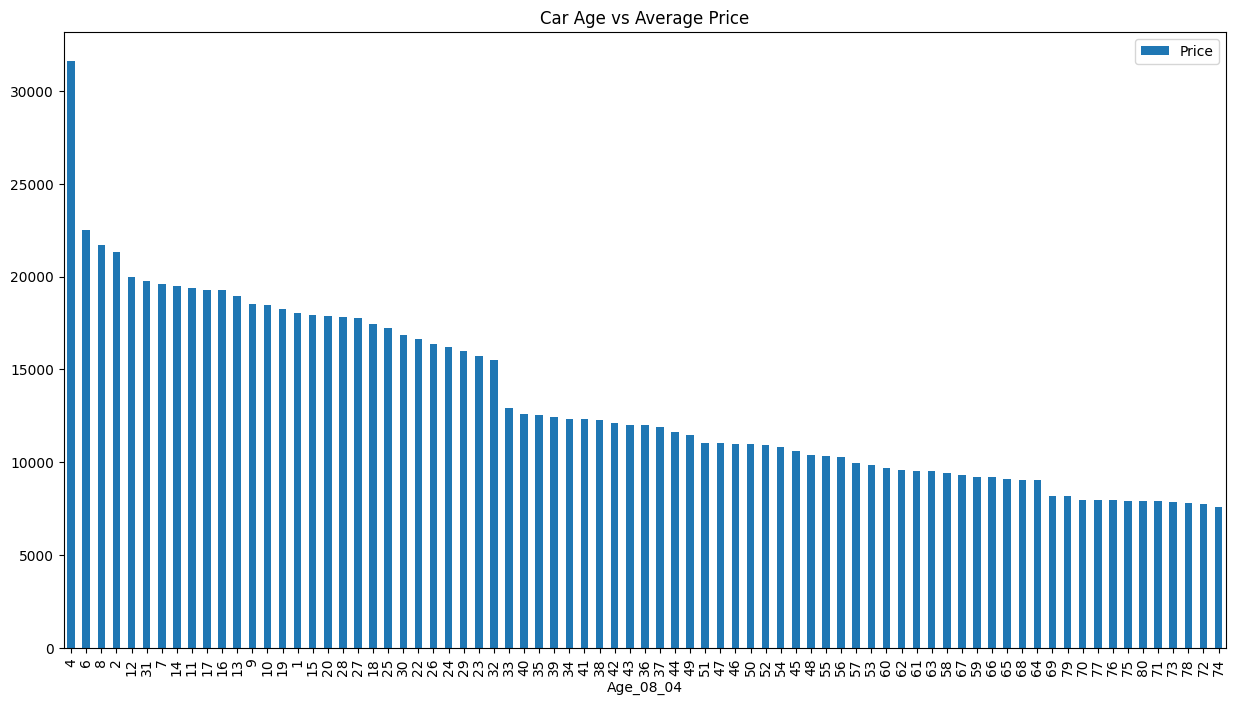

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(data1.groupby(['Age_08_04'])['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Age vs Average Price')
plt.show()

## **Insights**


*   Age= 4,6,8,2 seems to have highest average price.




## **Splitting the Data into Training and Testing Sets**
As we know, the first basic step for regression is performing a train-test split.

In [ ]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
# We divide the data into 70/30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
421,8950,53,90200,97,1400,3,5,69,1025
1422,7600,78,36000,110,1600,3,5,69,1050
385,9900,51,146736,110,1600,5,5,85,1080
752,8450,65,80439,110,1600,4,5,69,1035
972,9500,66,47237,110,1600,3,5,69,1050
...,...,...,...,...,...,...,...,...,...
803,10950,64,73376,110,1600,5,5,85,1070
53,21950,27,49866,192,1800,5,5,100,1195
351,9950,42,27141,97,1400,5,5,85,1060
79,14900,30,22000,97,1400,5,5,85,1110


## **Rescaling the Features**
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
sig_num_col = ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']

In [ ]:
# Apply scaler() to all the columns 
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [ ]:
df_train.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
421,-0.471215,-0.175105,0.563958,-0.271402,-0.357756,-1.062125,-0.130815,-0.439111,-0.875104
1422,-0.849527,1.177660,-0.880582,0.569410,0.047619,-1.062125,-0.130815,-0.439111,-0.406895
385,-0.204996,-0.283326,2.070757,0.569410,0.047619,1.030856,-0.130815,-0.048941,0.154957
752,-0.611331,0.474222,0.303808,0.569410,0.047619,-0.015635,-0.130815,-0.439111,-0.687820
972,-0.317088,0.528333,-0.581093,0.569410,0.047619,-1.062125,-0.130815,-0.439111,-0.406895


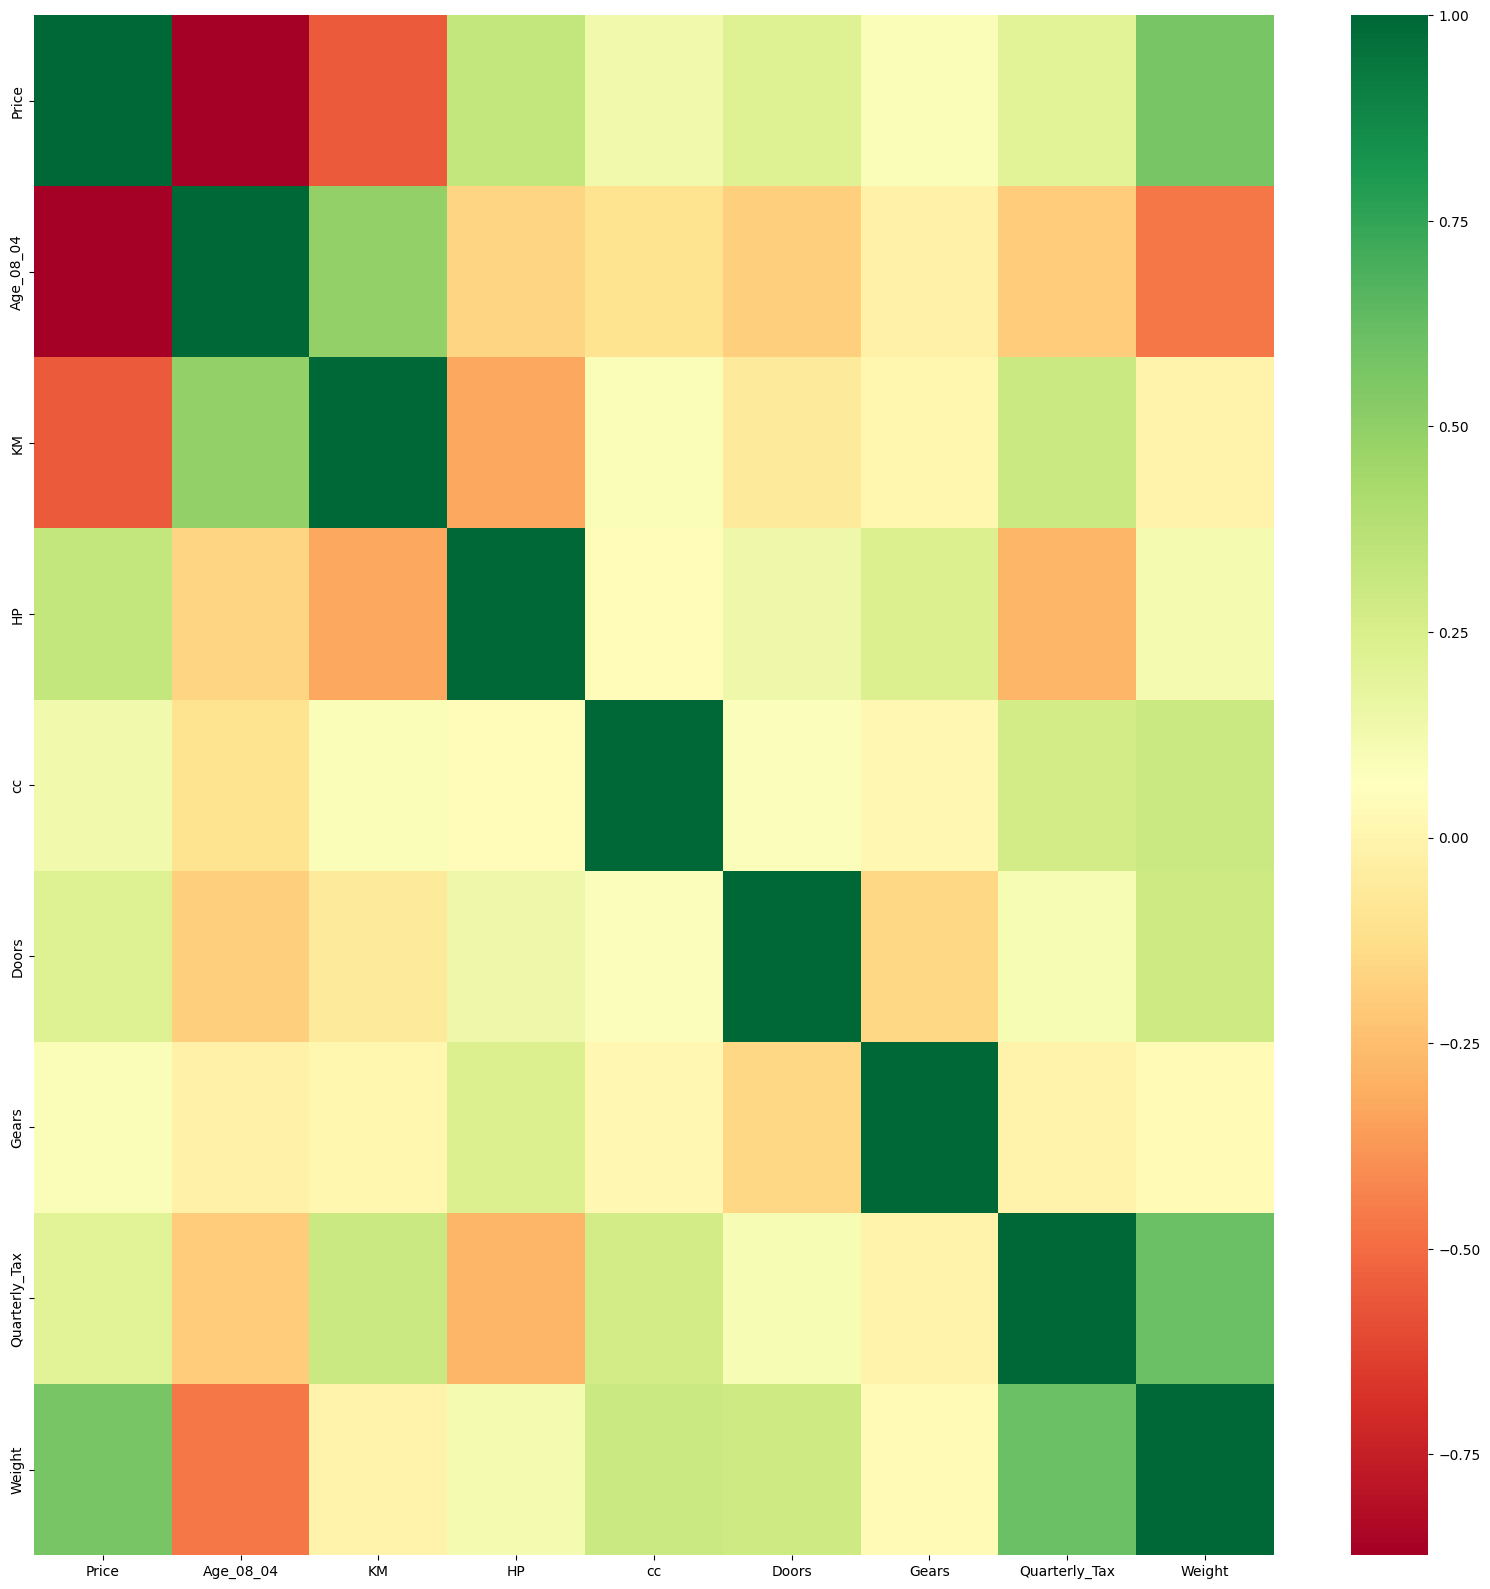

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

Age and KM are negetively correlated to Price 

Weight and HP is little positively correlated

## **Dividing into X and Y sets for the model building**

In [ ]:
y_train = df_train.pop('Price')
X_train = df_train

## **Building a Linear Model**

In [ ]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_train)

In [ ]:
prediction

421    -0.279802
1422   -0.599988
385    -0.146447
752    -0.467021
972    -0.255622
          ...   
803    -0.217179
53      2.472986
351     0.632501
79      1.284462
793    -0.169419
Length: 1004, dtype: float64

In [ ]:
# check parameters created
model.params

Age_08_04       -0.628023
KM              -0.211781
HP               0.140878
cc              -0.006346
Doors            0.006277
Gears            0.041753
Quarterly_Tax    0.048233
Weight           0.229759
dtype: float64

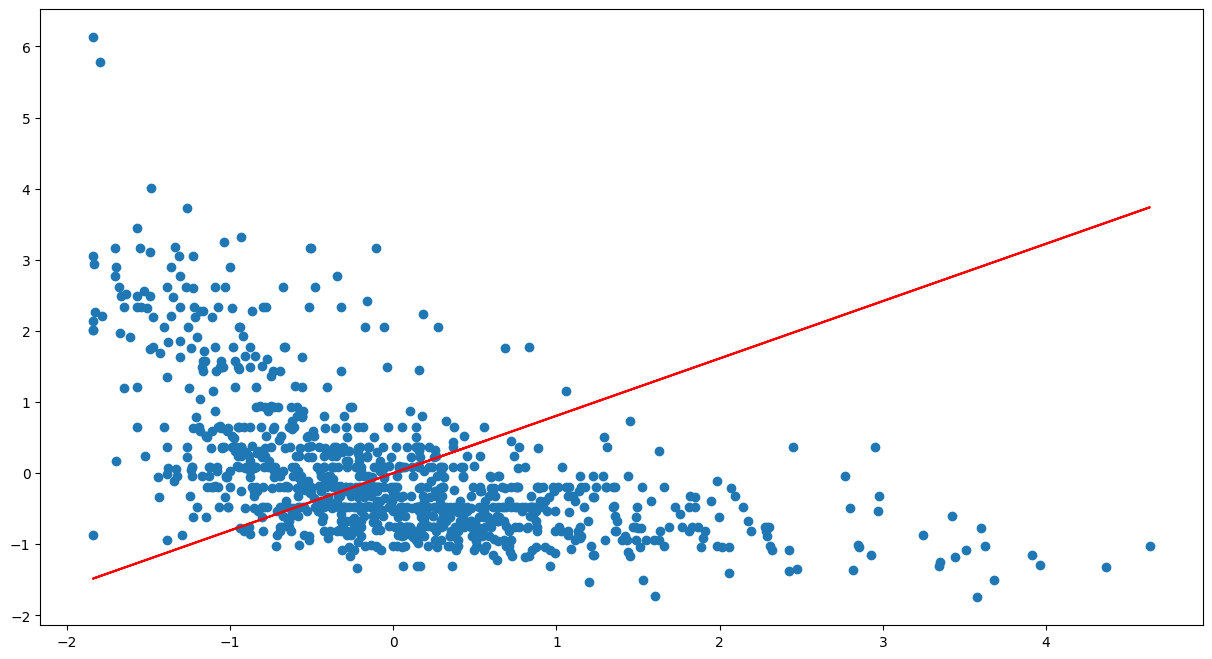

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train.iloc[:, 1], y_train)
plt.plot(X_train.iloc[:, 1], 0.8062*X_train.iloc[:, 1], 'r')
plt.show()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              758.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:02:55   Log-Likelihood:                         -440.98
No. Observations:                1004   AIC:                                      898.0
Df Residuals:                     996   BIC:                                      937.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04        -0.6280      0.016    -38.626      0.000      -0.660      -0.596
KM               -0.2118      0.016    -13.398      0.000      -0.243      -0.181
HP                0.1409      0.014      9.853      0.000       0.113       0.169
cc               -0.0063      0.013     -0.503      0.615      -0.031       0.018
Doors             0.0063      0.013      0.490      0.624      -0.019       0.031
Gears             0.0418      0.013      3.325      0.001       0.017       0.066
Quarterly_Tax     0.0482      0.018      2.720      0.007       0.013       0.083
Weight            0.2298      0.018     12.567      0.000       0.194       0.266
==============================================================================
Omnibus:                      100.125   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.722
Skew:                          -0.151   Prob(JB):                    7.40e-140
Kurtosis:                       6.902   Cond. No.                         2.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R2 value is good but our data has multicollinearity problem, so we have to eliminate that

Find Cook's distance

In [ ]:
inf=model.get_influence()

In [ ]:
s_df=inf.summary_frame()

In [ ]:
s_df.sort_values('cooks_d',ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.116551,-2.148886,-2.474535,2.638142e+01,0.480826,0.310102,-3.561377,-2.236904,8.384707e+01,6.609545,0.938855,25.899355,6.756053,26.473442
221,-1.183011,0.183392,0.668211,6.210690e-01,0.537762,0.068340,1.501640,-3.332155,1.363364e+00,-6.997654,0.182164,-3.302561,-7.172681,-3.385166
960,-0.872153,0.188153,0.927610,3.200787e-01,0.609683,-0.028273,1.636464,-2.470879,7.668550e-01,-4.901243,0.203430,-2.476861,-4.958949,-2.506023
109,0.372892,-0.460313,0.007255,-2.442244e-01,-0.219826,-0.086826,0.188958,0.973678,2.469886e-01,5.080543,0.071107,1.405670,5.145099,1.423531
601,-0.515093,0.460476,0.581056,-8.754049e-02,0.411751,-0.019854,0.715830,-1.187004,2.075713e-01,-5.822136,0.046701,-1.288631,-5.920838,-1.310477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,-0.000034,0.000117,-0.000101,-1.027545e-05,-0.000251,0.000014,-0.000089,0.000093,1.320937e-08,-0.008102,0.001607,-0.000325,-0.008098,-0.000325
1388,-0.000105,0.000039,0.000037,-2.049752e-05,-0.000066,-0.000008,0.000133,-0.000110,4.787451e-09,-0.002168,0.008081,-0.000196,-0.002167,-0.000196
256,-0.000079,0.000023,0.000039,2.052857e-06,0.000073,-0.000008,0.000016,-0.000058,1.930683e-09,0.002494,0.002477,0.000124,0.002493,0.000124
845,0.000002,0.000005,0.000040,7.897331e-06,-0.000060,-0.000026,-0.000001,-0.000005,6.847503e-10,0.001673,0.001954,0.000074,0.001672,0.000074


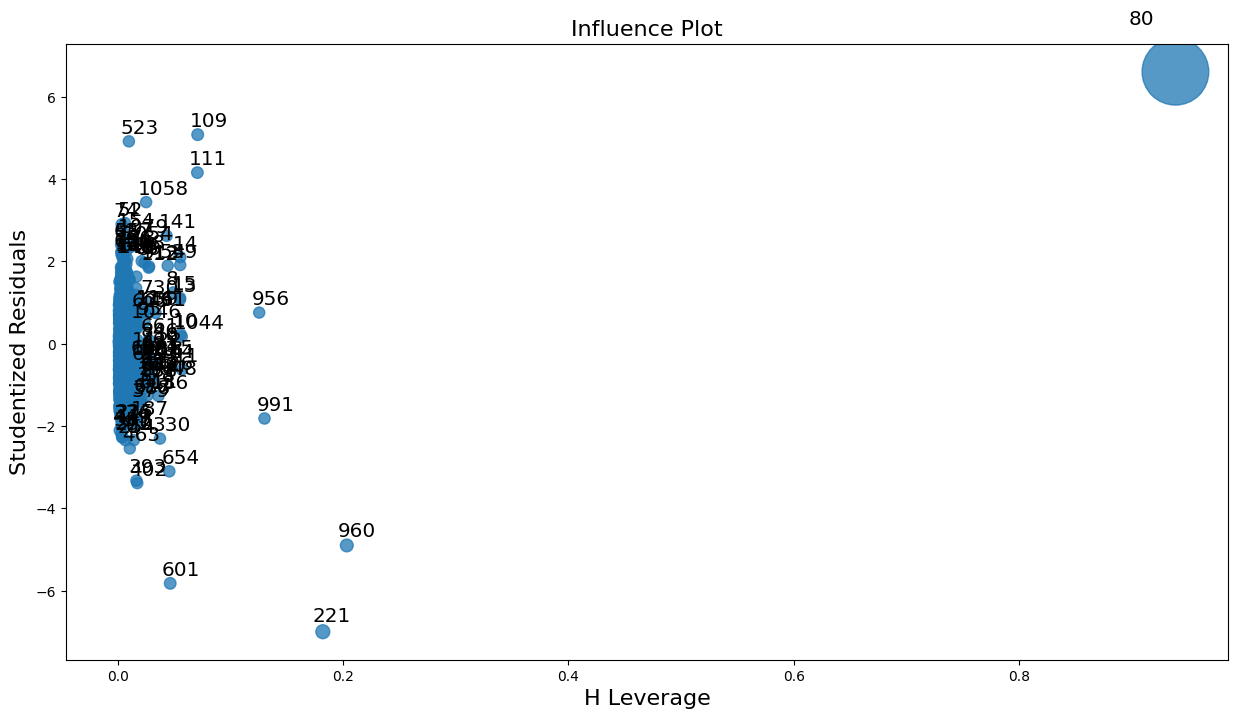

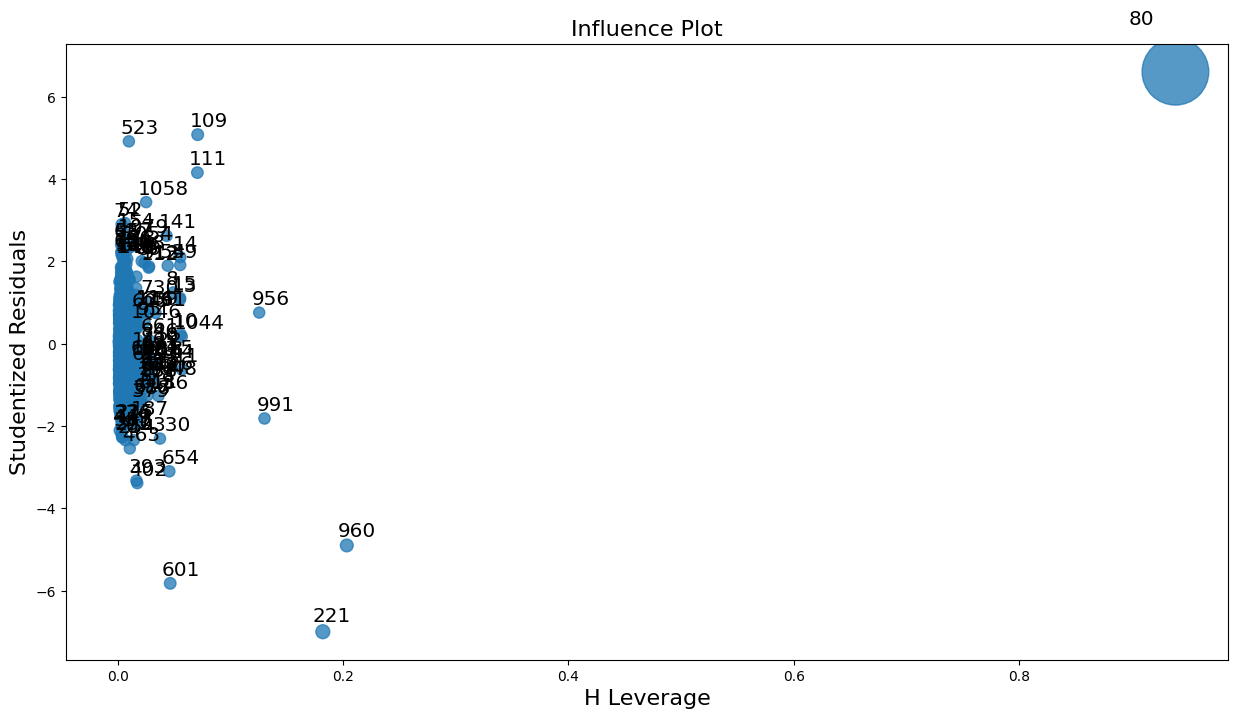

In [ ]:
inf.plot_influence()

index 80 has highest cook's distance so we have to eliminate this 

### Finding Variance Inflation Factor

In [ ]:
vif=pd.DataFrame()

In [ ]:
vif['VIF Factor']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]

In [ ]:
vif['features']=X_train.columns

In [ ]:
vif.round(1)

,VIF Factor,features
0,1.9,Age_08_04
1,1.8,KM
2,1.4,HP
3,1.1,cc
4,1.2,Doors
5,1.1,Gears
6,2.2,Quarterly_Tax
7,2.4,Weight


Weight has highest VIF, so we have to eliminate that to improve model

In [ ]:
new_X=X_train[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

In [ ]:
i_model=sm.OLS(y_train,new_X).fit()

In [ ]:
i_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              729.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:02:58   Log-Likelihood:                         -514.86
No. Observations:                1004   AIC:                                      1044.
Df Residuals:                     997   BIC:                                      1078.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04        -0.6995      0.016    -42.693      0.000      -0.732      -0.667
KM               -0.2022      0.017    -11.906      0.000      -0.236      -0.169
HP                0.1908      0.015     12.912      0.000       0.162       0.220
cc                0.0156      0.013      1.162      0.245      -0.011       0.042
Doors             0.0392      0.013      2.910      0.004       0.013       0.066
Gears             0.0416      0.014      3.078      0.002       0.015       0.068
Quarterly_Tax     0.1754      0.016     11.192      0.000       0.145       0.206
==============================================================================
Omnibus:                      178.738   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.710
Skew:                           0.798   Prob(JB):                    1.55e-153
Kurtosis:                       6.778   Cond. No.                         2.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Now we will develop the model by eliminating the index having highest cook's distance**

In [ ]:
data2=X_train.drop(X_train.index[80])
y_train=y_train.drop(y_train.index[80])



In [ ]:
data2.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
421,-0.175105,0.563958,-0.271402,-0.357756,-1.062125,-0.130815,-0.439111,-0.875104
1422,1.177660,-0.880582,0.569410,0.047619,-1.062125,-0.130815,-0.439111,-0.406895
385,-0.283326,2.070757,0.569410,0.047619,1.030856,-0.130815,-0.048941,0.154957
752,0.474222,0.303808,0.569410,0.047619,-0.015635,-0.130815,-0.439111,-0.687820
972,0.528333,-0.581093,0.569410,0.047619,-1.062125,-0.130815,-0.439111,-0.406895


In [ ]:
new_X=data2[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
new_Y=y_train

In [ ]:
ii_model=sm.OLS(new_Y,new_X).fit()
predictions=ii_model.predict(new_X)

In [ ]:
ii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              728.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:02:58   Log-Likelihood:                         -514.67
No. Observations:                1003   AIC:                                      1043.
Df Residuals:                     996   BIC:                                      1078.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04        -0.6990      0.016    -42.588      0.000      -0.731      -0.667
KM               -0.2026      0.017    -11.915      0.000      -0.236      -0.169
HP                0.1909      0.015     12.915      0.000       0.162       0.220
cc                0.0156      0.013      1.163      0.245      -0.011       0.042
Doors             0.0395      0.013      2.928      0.003       0.013       0.066
Gears             0.0416      0.014      3.076      0.002       0.015       0.068
Quarterly_Tax     0.1756      0.016     11.198      0.000       0.145       0.206
==============================================================================
Omnibus:                      178.249   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.028
Skew:                           0.797   Prob(JB):                    5.94e-153
Kurtosis:                       6.773   Cond. No.                         2.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here R2 value is high and p-value is smaller than 0.01 so we can accept this model

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


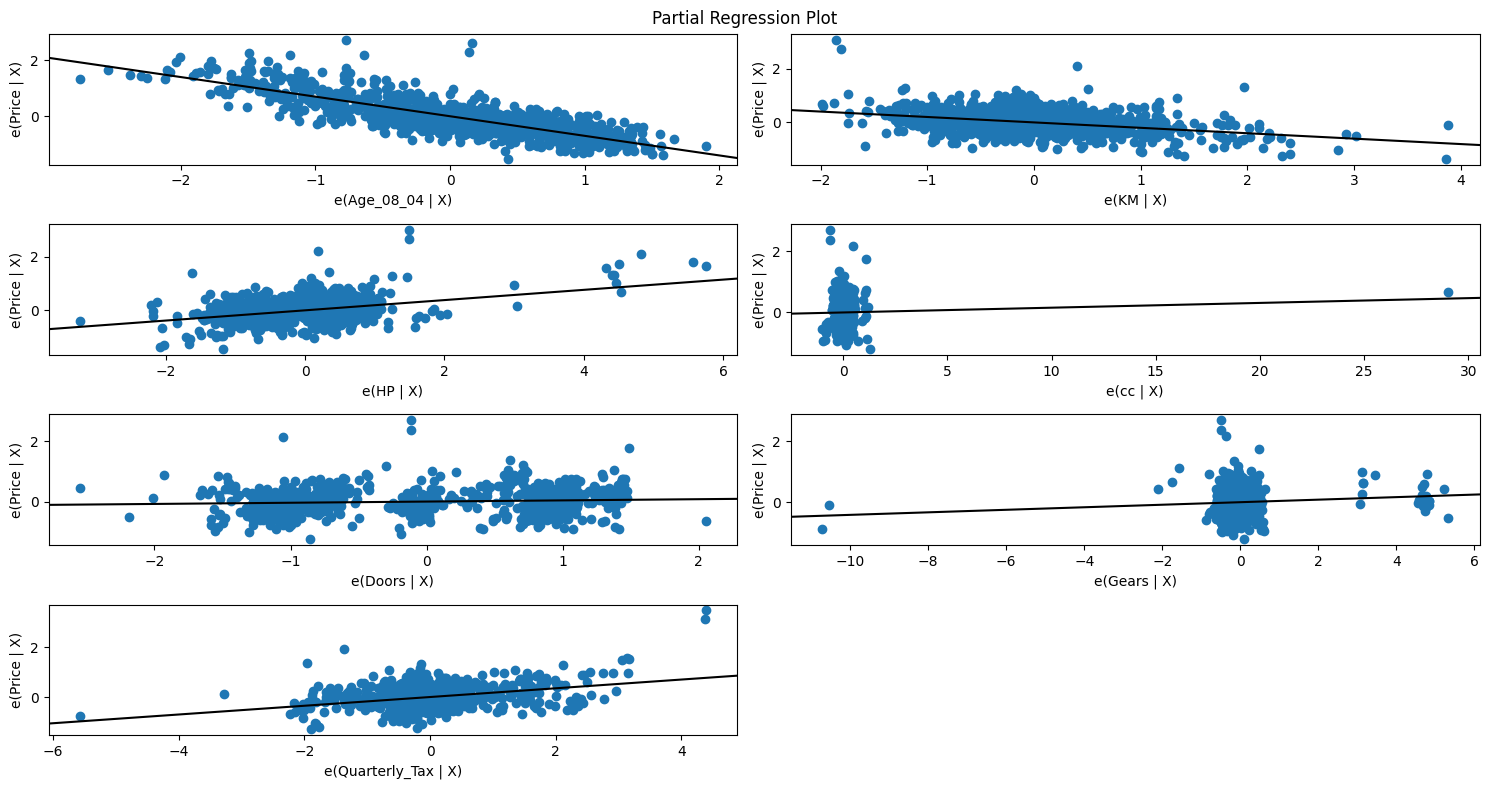

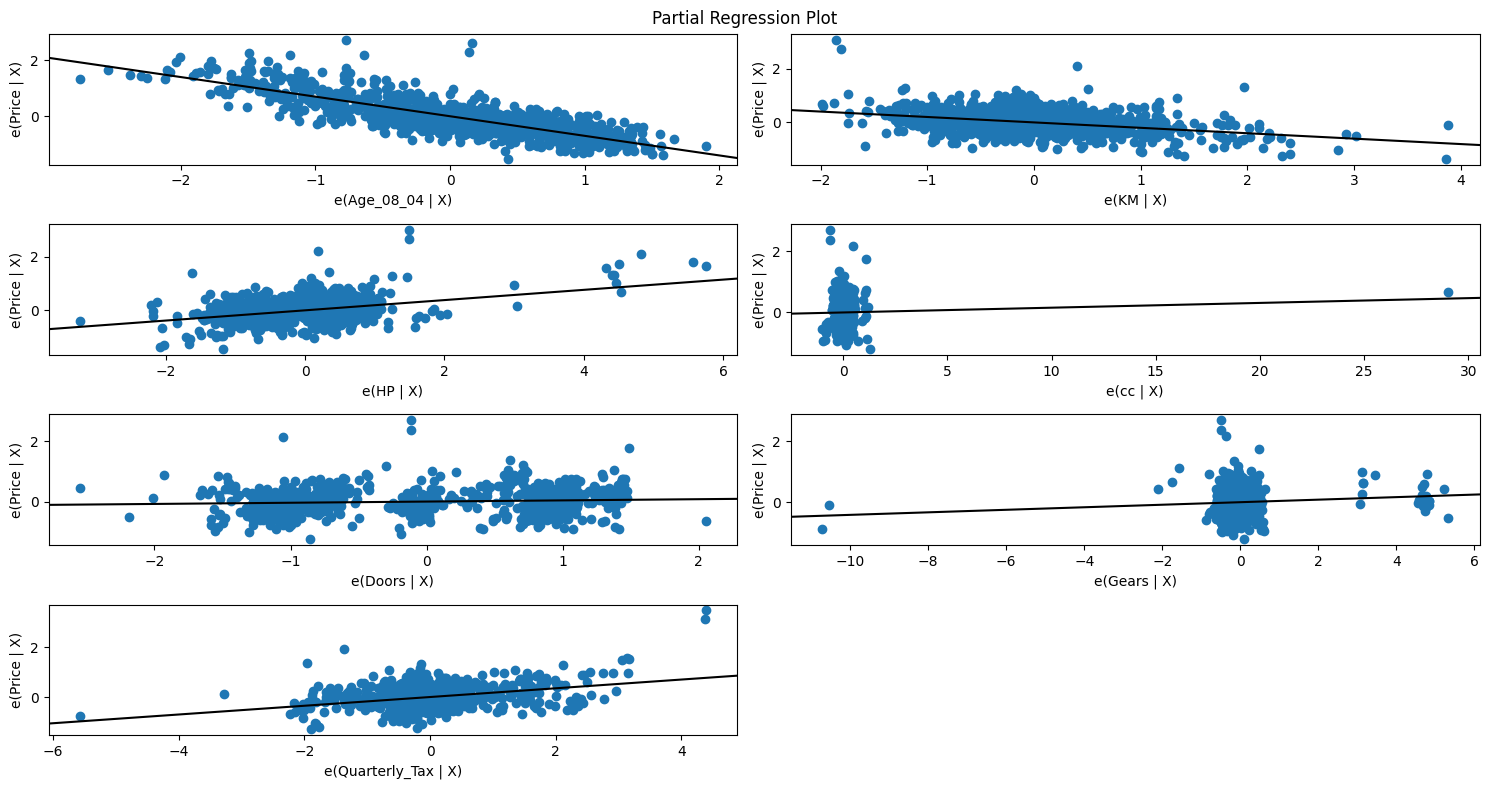

In [ ]:
sm.graphics.plot_partregress_grid(ii_model)

Variable plot for CC, Doors, Gears does not show any significance hence we can remove them

In [ ]:
new_X=new_X[['Age_08_04','KM','HP','Quarterly_Tax']]

In [ ]:
iii_model=sm.OLS(new_Y,new_X).fit()
predictions=iii_model.predict(new_X)

In [ ]:
iii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              1255.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:03:00   Log-Likelihood:                         -522.87
No. Observations:                1003   AIC:                                      1054.
Df Residuals:                     999   BIC:                                      1073.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04        -0.7066      0.016    -43.195      0.000      -0.739      -0.675
KM               -0.1963      0.017    -11.534      0.000      -0.230      -0.163
HP                0.2107      0.014     15.038      0.000       0.183       0.238
Quarterly_Tax     0.1861      0.015     12.204      0.000       0.156       0.216
==============================================================================
Omnibus:                      166.655   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.661
Skew:                           0.762   Prob(JB):                    5.56e-134
Kurtosis:                       6.516   Cond. No.                         2.33
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


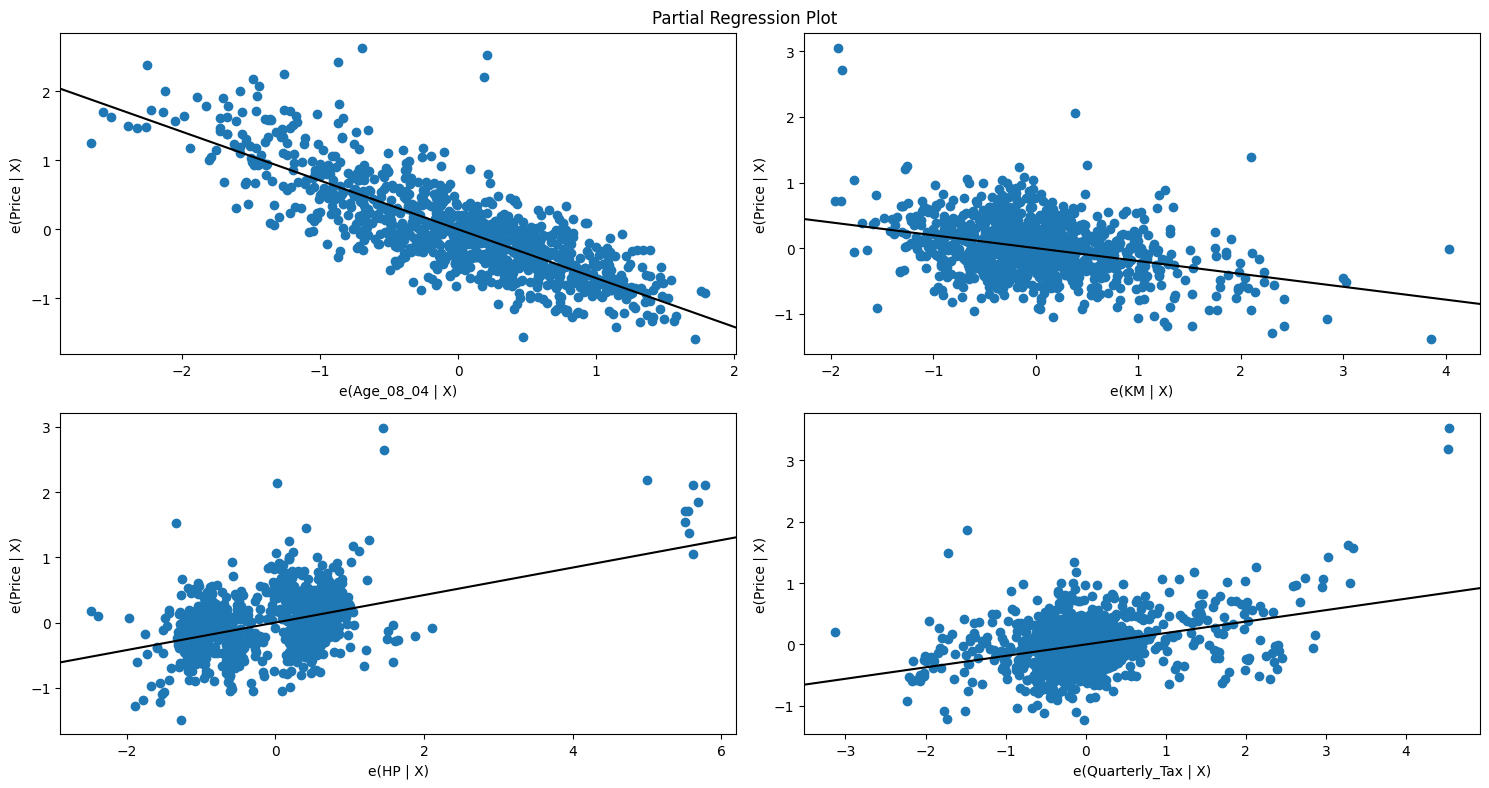

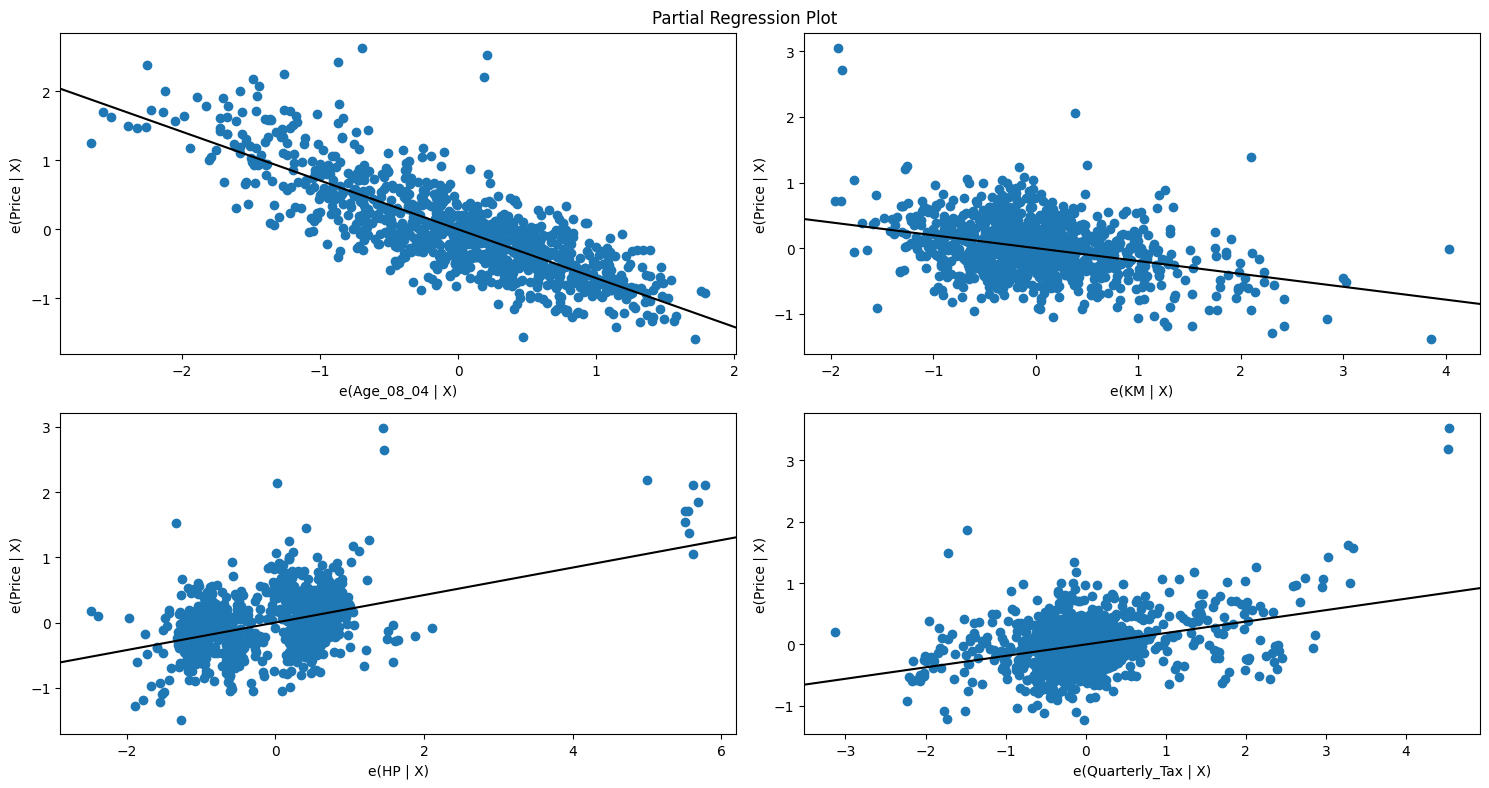

In [ ]:
sm.graphics.plot_partregress_grid(iii_model)

### **Making Predictions Using the Final Model**
**Applying the scaling on the test sets**

In [ ]:
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(431, 9)

**Dividing test set into X_test and y_test**

In [ ]:
y_test = df_test.pop('Price')
X_test = df_test

In [ ]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[new_X.columns]

In [ ]:
# Making predictions using the final model
iv_model=sm.OLS(y_test,X_test_new).fit()
y_pred = iv_model.predict(X_test_new)

In [ ]:
y_pred.head()

57      1.279726
1003    0.045051
361     0.957648
904    -0.033427
1277   -0.828548
dtype: float64

## **Model Evaluation**
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

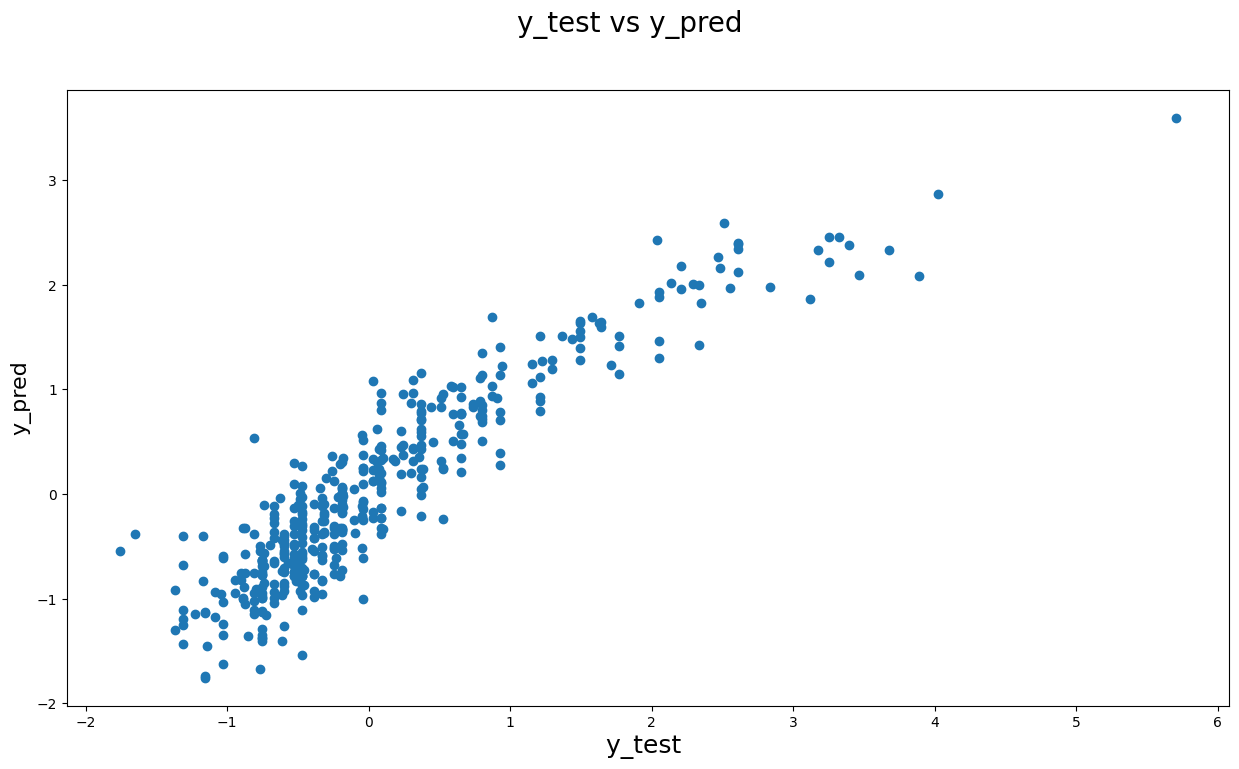

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ',fontsize=18)                       
plt.ylabel('y_pred',fontsize=16)    

## **RMSE Score**

In [ ]:
r2_score(y_test, y_pred)

0.841473064526469

**The R2 score of Training set is 0.837 and Test set is 0.8407 which is quite close. Hence, We can say that our model is good enough to predict the Car prices**

## **We can also use Ridge and lasso regularization technique to get better model**

In [ ]:
# create linear regression object
lm = LinearRegression()

# fit the linear regression model
m1=lm.fit(new_X, new_Y)

# predict car prices on test set
y_pred = lm.predict(X_test_new)



In [ ]:
# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 0.17149805772179952


In [ ]:
r2_score(y_test, y_pred)

0.8394648595194367

In [ ]:
# create ridge regression object
ridge = Ridge(alpha=1)

# fit the ridge regression model
ridge.fit(new_X, new_Y)

# predict car prices on test set
y_pred = ridge.predict(X_test_new)


In [ ]:

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression Mean Squared Error:", mse)


Ridge Regression Mean Squared Error: 0.17153372098361194


In [ ]:
r2_score(y_test, y_pred)

0.8394314760116518

In [ ]:

# create lasso regression object
lasso = Lasso(alpha=1)

# fit the lasso regression model
lasso.fit(new_X, new_Y)

# predict car prices on test set
y_pred = lasso.predict(X_test_new)


In [ ]:

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Lasso Regression Mean Squared Error:", mse)

Lasso Regression Mean Squared Error: 1.0751216940842472


In [ ]:
r2_score(y_test, y_pred)

-0.006395142232429096

## **We didn't get better score from ridge and lasso regularisation so we will use only previous model.**